In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

C:\Users\nolanchiggs\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Also filtered the games played "GP" to 75 and more because in statistics, the wider the range or sample size, the smaller the margin of error and the closer we are to finding the true mean. In some instance, I will be comparing the two throughout the project.

REMOVED ALL THE GAMES PLAYED "GP" THAT HAD ZERO VALUES

REALIZED THAT THE DATA ALSO INCLUDED OTHER LEAGUES AND I DECIDED TO FILTERED ONLY TO THE NBA 

In [2]:
players = pd.read_csv("basketball_players.csv")
master = pd.read_csv("basketball_master.csv")
nba = pd.merge(players, master, how="left", left_on="playerID", right_on="bioID")        #combines the two datasets
nba = nba[nba['lgID'] == 'NBA'] #selected nba league only
nba =nba[nba['GP'] > 0] #removes all the games played with zero  values 
nba75 = nba[nba['GP'] > 75] #filter applied here

In [3]:
nba['lgID']

0        NBA
1        NBA
2        NBA
3        NBA
4        NBA
        ... 
21808    NBA
21809    NBA
21810    NBA
21811    NBA
21812    NBA
Name: lgID, Length: 20239, dtype: object

### Calculate the mean and median number of points scored. (In other words, each row is the amount of points a player scored during a particular season. Calculate the median of these values. The result of this is that we have the median number of points players score each season.)

In [8]:
points= nba[["points", 'year']]                 # selects specific columns in the dataset
means = points.groupby(['year']).mean()           #finds average scores per season
medians = points.groupby(['year']).median()       #finds the center or middle scores per season
#group by function, takes into account all the points made in that specific year and yearly calculates the means and medians

#### MEANS
Its showing all the mean points for each respective season
~ sorting by points 

In [9]:
means.sort_values('points', ascending = False).tail(10)
# head limits to the first 10

,points
year,
2010,451.533088
1996,450.945205
2003,429.588008
1950,425.800000
2011,369.899225
1949,333.888476
1998,280.151899
1948,274.328571
1946,245.142077


#### MEDIANs

Its showing all the 'medians' points made in each respective season ~ sorting by points

In [10]:
medians.sort_values('points', ascending = False).tail(10)

,points
year,
2008,296.0
2007,286.0
1996,278.0
2003,271.0
2011,269.5
1949,267.0
1998,206.0
1948,202.0
1946,165.0


### Determine the highest number of points recorded in a single season. Identify who scored those points and the year they did so.

In [11]:
eez = nba[['year','points','GP','firstName', 'lastName']]
highest_points = eez.groupby(['year'])['points'].transform(max) == eez['points']
maximum = eez[highest_points].sort_values('year', ascending = False) # sorts from earliest to oldest


Its showing the highest points made by the player in that respective season ~ sorting by year

In [12]:
maximum

,year,points,GP,firstName,lastName
20910,2011,1850,66,Kevin,Durant
21430,2010,2161,78,Kevin,Durant
20378,2009,2472,82,Kevin,Durant
20200,2008,2386,79,Dwyane,Wade
19273,2007,2323,82,Kobe,Bryant
...,...,...,...,...,...
889,1950,1932,68,George,Mikan
663,1949,1865,68,George,Mikan
411,1948,1698,60,George,Mikan
301,1947,1007,48,Max,Zaslofsky


### Produce a boxplot that shows the distribution of total points, total assists, and total rebounds (each of these three is a separate box plot, but they can be on the same scale and in the same graphic).

#### Produced two boxplots and we realized that with 75 games or more, the outliers are reduced and the averages are much higher compared to when we include all games played

Text(0.5, 1.0, '75 GP_&_BEYOND')

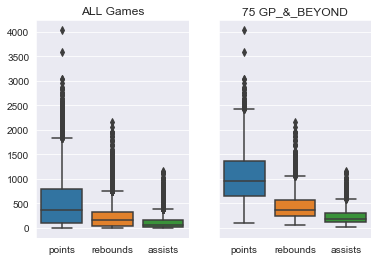

In [13]:
fig,(a, b) = plt.subplots(ncols=2, sharey=True)         # allows both boxplots to appear on the same line
sns.boxplot(data=nba[['points','rebounds', 'assists']], ax = a).set_title('ALL Games')    #produces the boxplots
sns.boxplot(data=nba75[['points','rebounds', 'assists']], ax =b).set_title('75 GP_&_BEYOND') #nba75 was used   


### Produce a plot that shows how the number of points scored has changed over time by showing the median of points scored per year, over time. The x-axis is the year and the y-axis is the median number of points among all players for that year# 

In [14]:
points_scored = nba[["points", "year"]].groupby("year").median()
points_scored.head(10)

,points
year,
1946,165.0
1947,156.0
1948,202.0
1949,267.0
1950,355.5
1951,474.0
1952,436.0
1953,452.0
1954,428.5


#### The plot produced is not really helpful for the dots are not constantly distributed, in other words, the distribution of this data is not normal, hmmm....

Text(0.5, 1.0, 'Points score changing over time')

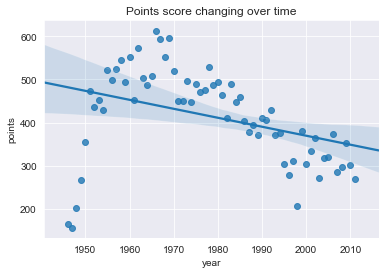

In [15]:
points_scored = points_scored.reset_index()   #makes it possible for it to be called in the next code
sns.regplot(data=points_scored, x="year", y="points").set_title("Points score changing over time")

#### I went on to use the filtered data and below are the results that have been produced. Its now consitent .Generally the average points scored has been decreasing over-time.

Text(0.5, 1.0, ' 75GP Points score changing over time')

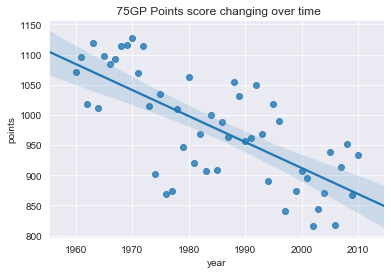

In [16]:
points_scoredd = nba75[["points", "year"]].groupby("year").median()        #nba75 data was used
points_scoredd = points_scoredd.reset_index()
sns.regplot(data=points_scoredd, x="year", y="points").set_title(" 75GP Points score changing over time")

# Part 2

### Some players score a lot of points because they attempt a lot of shots. Among players that have scored a lot of points, are there some that are much more efficient (points per attempt) than others?

#### Kareem was the most effecient score in fg

In [17]:
nba.columns
#,'ftAttempted','ftMade','threeAttempted','threeMade'
nba2= nba[['firstName', 'lastName','GP','points','fgAttempted','fgMade']]
nba3 = nba2[nba2['fgAttempted'] > 2000]
nba3.loc[:,'fgmade_per_attempt'] = nba3["fgMade"] / nba3["fgAttempted"]   # allows me to add a column
nba3.sort_values(['fgmade_per_attempt', 'fgAttempted'], ascending = False).head(10)

,firstName,lastName,GP,points,fgAttempted,fgMade,fgmade_per_attempt
4289,Kareem,Abdul-Jabbar,81,2822,2019,1159,0.574047
2199,Wilton,Chamberlain,80,3586,2770,1463,0.528159
2324,Wilton,Chamberlain,80,2948,2298,1204,0.523934
5704,Robert,McAdoo,82,2831,2138,1095,0.512161
1972,Wilton,Chamberlain,79,3033,2457,1251,0.509158
2078,Wilton,Chamberlain,80,4029,3159,1597,0.505540
12196,Michael,Jordan,78,2541,2003,992,0.495257
4713,Nathaniel,Archibald,80,2719,2106,1028,0.488129
9769,Michael,Jordan,82,3041,2279,1098,0.481790
5499,Richard,Barry,80,2450,2217,1028,0.463690


#### Jerry West was the most effecient "ft" scorer

## The more attempts are made, then the probality of scoring increases 

In [18]:
nba4= nba[['firstName', 'lastName','GP','points','ftAttempted','ftMade']]    #selects specific columns
nba5 = nba4[nba4['ftAttempted'] > 900]  # only returns 900 attempts and above
nba5.loc[:,'ftmade_per_attempt'] = nba5["ftMade"] / nba5["ftAttempted"] #adds a new column
nba5.sort_values(['ftmade_per_attempt', 'ftAttempted'], ascending = False).head(10) # sorting by the columns inside the ()

,firstName,lastName,GP,points,ftAttempted,ftMade,ftmade_per_attempt
2673,Jerry,West,79,2476,977,840,0.859775
8648,Adrian,Dantley,79,2418,946,813,0.859408
9769,Michael,Jordan,82,3041,972,833,0.856996
2399,Oscar,Robertson,79,2480,938,800,0.852878
9098,Moses,Malone,79,1941,904,737,0.815265
2148,Robert,Pettit,78,2429,901,695,0.771365
2177,Jerry,West,75,2310,926,712,0.768898
10566,Karl,Malone,80,2326,918,703,0.765795
10975,Karl,Malone,82,2540,913,696,0.762322
9989,Charles,Barkley,80,2264,951,714,0.750789


### Overal attempts,more attempts, more points

In [19]:
nba
nba['attempts'] =nba['fgAttempted'] + nba['ftAttempted'] + nba['threeAttempted']

In [20]:
gee = nba[['year','GP','points','firstName', 'lastName', 'attempts']]
highest_points = gee.groupby(['year'])['points'].transform(max) == gee['points']
maximum = gee[highest_points].sort_values('points', ascending = False)
maximum.head(10)

,year,GP,points,firstName,lastName,attempts
2078,1961,80,4029,Wilton,Chamberlain,4522
2199,1962,80,3586,Wilton,Chamberlain,3883
9769,1986,82,3041,Michael,Jordan,3317
1972,1960,79,3033,Wilton,Chamberlain,3511
2324,1963,80,2948,Wilton,Chamberlain,3314
10139,1987,82,2868,Michael,Jordan,2911
18270,2005,80,2832,Kobe,Bryant,3510
5704,1974,82,2831,Robert,McAdoo,2934
4289,1971,81,2822,Kareem,Abdul-Jabbar,2751
2685,1966,78,2775,Richard,Barry,3092


## It seems like some players may excel in one statistical category, but produce very little in other areas. Are there any players that are exceptional across many categories?

### Wilton had the most rebounds and most points for at least 5 years, and 2 years back to back. That's impressive, GOAT!

In [21]:
across = nba[['year','assists', 'rebounds','height','points','steals','firstName', 'lastName','GP','points']]
across.sort_values(['rebounds'], ascending = False).head(10)

,year,assists,rebounds,height,points,steals,firstName,lastName,GP,points
1972,1960,148,2149,85.0,3033,0,Wilton,Chamberlain,79,3033
2078,1961,192,2052,85.0,4029,0,Wilton,Chamberlain,80,4029
2697,1966,630,1957,85.0,1956,0,Wilton,Chamberlain,81,1956
2856,1967,702,1952,85.0,1992,0,Wilton,Chamberlain,82,1992
2199,1962,275,1946,85.0,3586,0,Wilton,Chamberlain,80,3586
2578,1965,414,1943,85.0,2649,0,Wilton,Chamberlain,79,2649
1859,1959,168,1941,85.0,2707,0,Wilton,Chamberlain,72,2707
2403,1963,370,1930,81.0,1168,0,William,Russell,78,1168
2534,1964,410,1878,81.0,1102,0,William,Russell,78,1102
2043,1960,268,1868,81.0,1322,0,William,Russell,78,1322


### Average height? Wilton was way above the average height which gave him the advantage. The results below shows it. 

In [22]:
average = across['height'].mean()
average

78.35446415336726

## Much has been said about the rise of the three-point shot in recent years. It seems that players are shooting and making more three-point shots than ever. Recognizing that this dataset doesn't contain the very most recent data, do you see a trend of more three-point shots either across the league or among certain groups of players? Is there a point at which popularity increased dramatically?

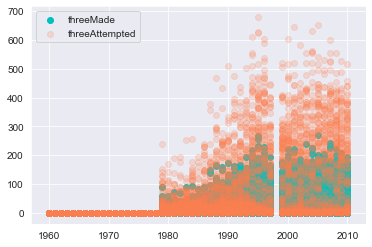

In [23]:
plt.scatter(nba75['year'], nba75['threeMade'], color = 'c', label = 'threeMade') 
plt.scatter(nba75['year'], nba75['threeAttempted'], color = 'coral', alpha =0.2, label = 'threeAttempted')
#alpha make the color to fade
plt.legend()
plt.show() 

### I am predicting 1995 because it looks to be in middle of 1990 and 2000

In [24]:
threes = nba[['year','threeAttempted','threeMade','GP','firstName', 'lastName']]                         
threes.sort_values('threeAttempted', ascending  = False). head(10)

,year,threeAttempted,threeMade,GP,firstName,lastName
13573,1995,678,257,79,George,McCloud
18202,2005,653,269,78,Walter,Allen
16671,2001,645,222,81,Antoine,Walker
18070,2004,631,226,79,Quentin,Richardson
13692,1995,628,267,82,Dennis,Scott
13338,1995,623,231,81,Daron,Blaylock
13239,1994,611,217,80,John,Starks
13826,1996,604,221,78,Daron,Blaylock
16199,2000,603,221,81,Antoine,Walker
19600,2007,599,243,82,Jason,Richardson


### 'WAS RIGHT', 1994 and 1995 was when the players started to attempt more 3-point shots. One thing to note is that you needed to have played at missed 4 games in the entire season to have so many attempts. There are 3 players from the 1995 season that are in the top 6 of the attempted 3's